In [ ]:
!pip install catboost
!pip install shap
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 109 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.3 MB 3.8 MB/s 
     |████████████████████████████████| 237 kB 43.2 MB/s 
     |████████████████████████████████| 78 kB 5.3 MB/s 
     |████████████████████████████████| 182 kB 42.1 MB/s 
     |████████████████████████████████| 164 kB 7.3 MB/s 
     |████████████████████████████████| 4.7 MB 35.0 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 51 kB 3.1 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=97e72a4fdb333b4b14d9ef92db1742cbaa594

In [ ]:
# Load packages
import dill
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Transformations de variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Modèles de ML
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import ElasticNet


#from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import ElasticNet
from xgboost import plot_importance

# Metrics de ML
from sklearn.metrics import auc, roc_curve, roc_auc_score, make_scorer
#from sklearn.metrics import precision_recall_cur

# Packages de cross_validation
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score, make_scorer
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.metrics import recall_score, f1_score, accuracy_score


# Packages hyperopt pour la séléction d'hyperparamètres
from hyperopt import hp, tpe
from hyperopt.fmin import fmin
from imblearn.over_sampling import SMOTE

# Librairies graphiques
import plotly.offline as py
import plotly.graph_objs as go
import plotly.offline as offline
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import *
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
default_dir = '/content/drive/MyDrive/DS_P7/'

df = pd.read_csv(os.path.join(default_dir,'app_train_encoded.csv'))
df_no_encoded = pd.read_csv(os.path.join(default_dir,'app_train_domain_no_enconded_featureengineering.csv'))

Mounted at /content/drive/


In [ ]:
# Fonction pour afficher les statistiques de base du dataset
def describe_columns_df(df):
    """
    Affiche la description détaillée du contenu de chaque colonne de df
    df(pd.Dataframe): jeu de données
    """
    for col in df:
        print(col)
        null = df[col].isnull().sum()
        # affiche le nombre de valeurs manquantes
        print('Nombre de valeurs manquantes : ', null)
        # affiche le pourcentage de valeurs manquantes
        print('pourcentage de valeurs manquantes : ', 100*null/df.shape[0])
        print(df[col].describe())
        if df[col].dtype == object:
            print('Catégories et nombre:')
            print(df[col].value_counts().to_string(header=None))
        print('\n')

In [ ]:
describe_columns_df(df)

SK_ID_CURR
Nombre de valeurs manquantes :  0
pourcentage de valeurs manquantes :  0.0
count    307505.000000
mean     278181.821811
std      102790.177600
min      100002.000000
25%      189147.000000
50%      278203.000000
75%      367144.000000
max      456255.000000
Name: SK_ID_CURR, dtype: float64


CNT_CHILDREN
Nombre de valeurs manquantes :  0
pourcentage de valeurs manquantes :  0.0
count    307505.00000
mean          0.41705
std           0.72212
min           0.00000
25%           0.00000
50%           0.00000
75%           1.00000
max          19.00000
Name: CNT_CHILDREN, dtype: float64


AMT_INCOME_TOTAL
Nombre de valeurs manquantes :  0
pourcentage de valeurs manquantes :  0.0
count    3.075050e+05
mean     1.687967e+05
std      2.371248e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


AMT_CREDIT
Nombre de valeurs manquantes :  0
pourcentage de valeurs manquantes :  0.0

## Remplissage données manquantes 


In [ ]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values = missing_values_table(df)
missing_values.head(50)

Your selected dataframe has 253 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_AVG,214861,69.9
COMMONAREA_MEDI,214861,69.9
COMMONAREA_MODE,214861,69.9
NONLIVINGAPARTMENTS_MODE,213511,69.4
NONLIVINGAPARTMENTS_MEDI,213511,69.4
NONLIVINGAPARTMENTS_AVG,213511,69.4
LIVINGAPARTMENTS_MEDI,210196,68.4
LIVINGAPARTMENTS_AVG,210196,68.4
LIVINGAPARTMENTS_MODE,210196,68.4
FLOORSMIN_AVG,208639,67.8


Text(0.5, 0, 'Nom de la colonne')

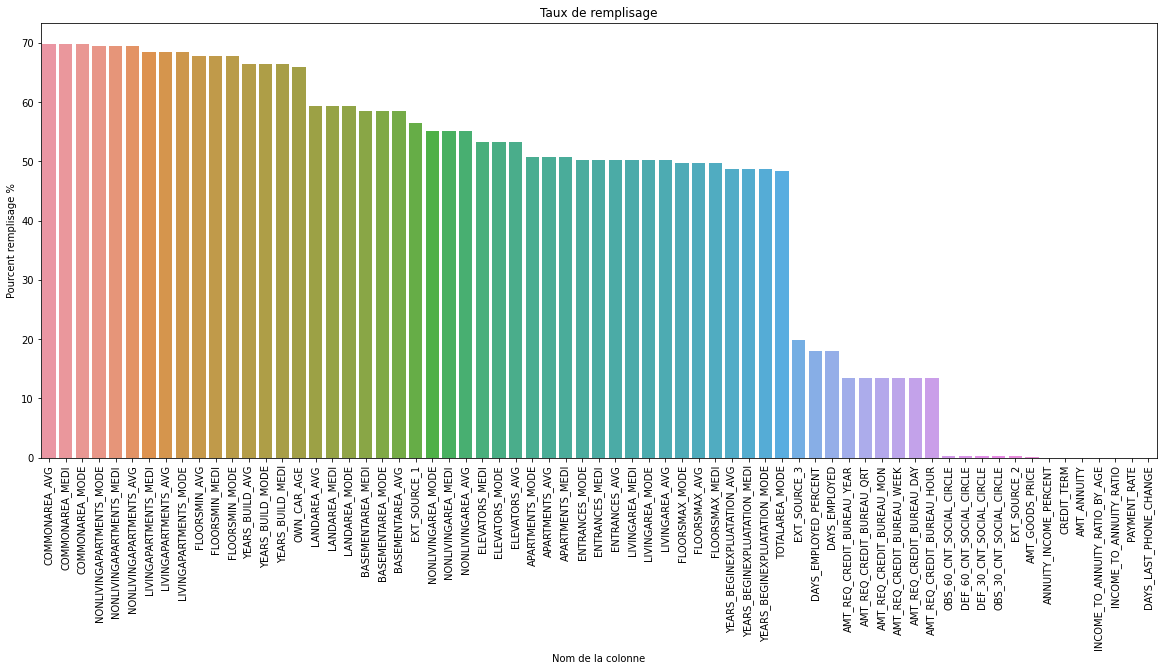

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('Taux de remplisage')
sns.barplot(x=missing_values.index, y=missing_values['% of Total Values'])
plt.xticks(rotation=90)
plt.ylabel('Pourcent remplisage %')
plt.xlabel("Nom de la colonne")

In [ ]:
# on remet à jour la liste des colonnes catégorielles
# Séparation des variables catégorielles et numériques
num_var = df.select_dtypes(include=['int64','float64'])
cat_var = df.select_dtypes(exclude=['int64','float64']) 
print(cat_var.columns.tolist())
print('='*100)
print(num_var.columns.tolist())
df_model = pd.concat([cat_var, num_var], axis=1)


['DAYS_EMPLOYED_ANOM']
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION

In [ ]:
df['DAYS_EMPLOYED_ANOM']

0         False
1         False
2         False
3         False
4         False
          ...  
307500    False
307501     True
307502    False
307503    False
307504    False
Name: DAYS_EMPLOYED_ANOM, Length: 307505, dtype: bool

In [ ]:
df.shape

(307505, 253)

In [ ]:
col_int_train = df.select_dtypes(include = 'int64')
print(pd.DataFrame(col_int_train.isnull().sum().sort_values(ascending = False)))

                                      0
SK_ID_CURR                            0
ORGANIZATION_TYPE_Legal Services      0
ORGANIZATION_TYPE_Electricity         0
ORGANIZATION_TYPE_Emergency           0
ORGANIZATION_TYPE_Government          0
...                                  ..
NAME_INCOME_TYPE_Unemployed           0
NAME_INCOME_TYPE_Working              0
NAME_EDUCATION_TYPE_Academic degree   0
NAME_EDUCATION_TYPE_Higher education  0
EMERGENCYSTATE_MODE_Yes               0

[178 rows x 1 columns]


In [ ]:
col_float_train = df.select_dtypes(include = 'float64')
print(pd.DataFrame(col_float_train.isnull().sum().sort_values(ascending = False)))

                                 0
COMMONAREA_AVG              214861
COMMONAREA_MODE             214861
COMMONAREA_MEDI             214861
NONLIVINGAPARTMENTS_MODE    213511
NONLIVINGAPARTMENTS_MEDI    213511
...                            ...
INCOME_PER_PERSON                0
CREDIT_INCOME_PERCENT            0
DAYS_REGISTRATION                0
REGION_POPULATION_RELATIVE       0
AMT_INCOME_TOTAL                 0

[74 rows x 1 columns]


### Transformation des données
Pipeline d'imputation des valeurs manquantes et standardisation


In [ ]:
col = col_float_train.columns
data_imputed = df[col]
imp = SimpleImputer(missing_values=np.nan, strategy='median')
df.loc[:,col] = imp.fit_transform(data_imputed[col])

In [ ]:
from sklearn import preprocessing
ohe = preprocessing.OneHotEncoder(handle_unknown='ignore', sparse=False)

col = df.select_dtypes(include = 'object').columns
cat_train = df.select_dtypes(include = 'object')
cat_train = cat_train.apply(lambda col: ohe.fit_transform(col))


## sample du dataset

In [ ]:
df_sample = df.copy()
df_sample[col] = cat_train
#Réduire la dimensionnalité
df_sample = df_sample.sample(frac = 0.3) 
df_sample

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
207659,340701,0,67500.0,808650.0,26086.5,675000.0,0.025164,23254,-1648.0,-4301.0,...,0,0,0,0,0,0,0,0,0,0
61470,171293,0,360000.0,497520.0,56263.5,450000.0,0.025164,15296,-6055.0,-3197.0,...,0,1,0,0,0,0,0,0,1,0
167245,293882,2,900000.0,1237500.0,61875.0,1237500.0,0.019689,11060,-637.0,-4709.0,...,0,0,0,0,0,0,0,0,0,0
164291,290456,0,85500.0,254700.0,17019.0,225000.0,0.028663,24449,-1648.0,-5483.0,...,0,0,0,0,0,0,1,0,1,0
304014,452238,0,360000.0,1363500.0,47524.5,1363500.0,0.015221,22129,-1648.0,-4354.0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20606,124025,2,112500.0,544491.0,20133.0,454500.0,0.005002,11483,-308.0,-2151.0,...,0,0,0,0,0,0,0,0,0,0
190906,321365,0,157500.0,495000.0,52110.0,495000.0,0.006008,24661,-1648.0,-1962.0,...,0,0,0,0,0,0,1,0,1,0
57352,166470,0,90000.0,255960.0,17235.0,202500.0,0.009334,8733,-122.0,-8713.0,...,0,0,0,0,0,0,0,0,0,0
193354,324225,0,225000.0,540000.0,30280.5,540000.0,0.035792,16136,-4914.0,-8152.0,...,0,0,0,0,0,0,0,0,0,0


## Train_test_split

In [ ]:
df_sample.shape

(92252, 253)

In [ ]:
# On split le jeu d'entrainement en entrainement et test
from sklearn.model_selection import train_test_split

X = df_sample.drop('TARGET', axis=1)
y = df_sample['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print('taille X_train:', X_train.shape)
print('taille X_test:', X_test.shape)
print('taille y_train:', y.shape)
print('taille y_test:', y_test.shape)

taille X_train: (73801, 252)
taille X_test: (18451, 252)
taille y_train: (92252,)
taille y_test: (18451,)


In [ ]:
print(y_train.mean())
print(y_test.mean())

0.08043251446457365
0.08183838274348273


In [ ]:
X_app_train=pd.DataFrame(X_train,columns=X.columns)
X_app_test=pd.DataFrame(X_test,columns=X.columns)

## Modeling et analyse la variable 'Target'  à prédire

# Calculer les métriques sur les bases de train/test : recall, F1-score, AUC, matrice de confusion

Pour la classification binaire, les métriques pour estimer les erreurs entre y_pred et y_test sont :

**precision** Quelle portion du target prédit sont du vrai classe ?



> precision = TP / (TP + FP)



**ROC AUC (Area Under the Curve)** : peut être comparé entre modèles

**recall**  Quelle portion du vrai classe sont présent dans le classe prédit ?

> recall = TP / (TP + FN)


**F1-score** Accuracy équilibré

>F1 = 2 (precision recall) / (precision + recall)
>F1 = (2 TP) / (2 TP + FP + FN)

**Fbeta-score** Generalisation de F1-score pour mettre plus de poids sur precision , pour mettre plus de poid sur recall (ex: beta=2)


### DummyClassifier


The confusion matrix is: [[16941     0]
 [ 1510     0]]
The accuracy for mode model is: 0.9181616172565172
The roc_auc score for the model model is: 0.5
The f1 score for the model model is: 0.0
The recall score 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



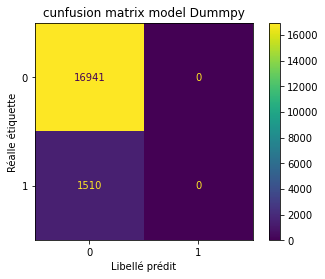

In [ ]:
# create DummyClassifier model and generate predictions
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_train)

y_dummy_pred_proba=dummy.predict_proba(X_test) #Calcul de la proba d'appartenance àchaque classe 
y_pred_dummy=np.where(y_dummy_pred_proba>0.5,1,0)[:,1] #Calcul de la classe d'appartenance (seuil 0.5)

accuracy_score_dummy = accuracy_score(y_test, y_pred_dummy)
roc_auc_dummy= roc_auc_score(y_test,y_dummy_pred_proba[:,1])#Calcul du ROC_AUC
f1_score_dummy = f1_score(y_test, y_pred_dummy) #calcul du F1 Score
recall_score_dummy = recall_score(y_test, y_pred_dummy)#calcul du Recall 

#Printing accuracy scores, roc_auc, F1, recall
print('The confusion matrix is:', confusion_matrix(y_test, y_pred_dummy))
print('The accuracy for mode model is:', accuracy_score_dummy)
print('The roc_auc score for the model model is:',roc_auc_dummy)
print('The f1 score for the model model is:',f1_score_dummy)
print("The recall score"  ,recall_score_dummy)

#Ploting the cunfusion matrix
plot_confusion_matrix(dummy, X_test, y_test, cmap='viridis')
plt.title('cunfusion matrix model Dummpy')
plt.xlabel('Libellé prédit')
plt.ylabel('Réalle étiquette')
plt.show()

### DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

The confusion matrix is: [[15406  1535]
 [ 1261   249]]
The accuracy for mode model is: 0.8484634979133923
The roc_auc score for the model model is: 0.5371460397616816
The f1 score for the model model is: 0.15118397085610197
The recall score 0.16490066225165562


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



<Figure size 360x360 with 0 Axes>

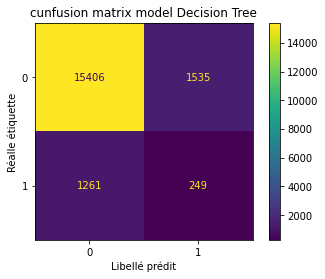

In [ ]:
# create random forest model and generate predictions
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

y_dtc_pred_proba=dtc.predict_proba(X_test) #Calcul de la proba d'appartenance àchaque classe 
y_pred_dtc=np.where(y_dtc_pred_proba>0.5,1,0)[:,1] #Calcul de la classe d'appartenance (seuil 0.5)

accuracy_score_dtc = accuracy_score(y_test, y_pred_dtc)
roc_auc_dtc= roc_auc_score(y_test,y_dtc_pred_proba[:,1])
f1_score_dtc = f1_score(y_test, y_pred_dtc)
recall_score_dtc = recall_score(y_test, y_pred_dtc)

#Printing accuracy scores, roc_auc, F1, recall
print('The confusion matrix is:', confusion_matrix(y_test, y_pred_dtc))
print('The accuracy for mode model is:', accuracy_score_dtc)
print('The roc_auc score for the model model is:',roc_auc_dtc)
print('The f1 score for the model model is:',f1_score_dtc)
print("The recall score"  ,recall_score_dtc)

#Ploting the cunfusion matrix
plt.figure(figsize = (5,5))
plot_confusion_matrix(dtc, X_test, y_test, cmap='viridis')
plt.title('cunfusion matrix model Decision Tree')
plt.xlabel('Libellé prédit')
plt.ylabel('Réalle étiquette')
plt.show()

### Random Forest

The confusion matrix is: [[16941     0]
 [ 1509     1]]
The roc_auc score for the model model is: 0.7073607037435338
The accuracy for mode model is: 0.9182158148609831
The f1 score for the model model is: 0.0013236267372600927
The recall score 0.0006622516556291391


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



<Figure size 360x360 with 0 Axes>

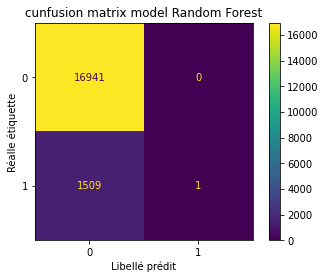

In [ ]:
# create random forest model and generate predictions
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

y_rfc_pred_proba=rfc.predict_proba(X_test) #Calcul de la proba d'appartenance àchaque classe 
y_pred_rfc=np.where(y_rfc_pred_proba>0.5,1,0)[:,1] #Calcul de la classe d'appartenance (seuil 0.5)
  
accuracy_score_rfc = accuracy_score(y_test, y_pred_rfc)
roc_auc_rfc= roc_auc_score(y_test,y_rfc_pred_proba[:,1])
f1_score_rfc = f1_score(y_test, y_pred_rfc)
recall_score_rfc = recall_score(y_test, y_pred_rfc)

#Printing accuracy scores, roc_auc, F1, recall
print('The confusion matrix is:', confusion_matrix(y_test, y_pred_rfc))
print('The roc_auc score for the model model is:',roc_auc_rfc)
print('The accuracy for mode model is:', accuracy_score_rfc)
print('The f1 score for the model model is:',f1_score_rfc)
print("The recall score" ,recall_score_rfc)

#Ploting the cunfusion matrix
plt.figure(figsize = (5,5))
plot_confusion_matrix(rfc, X_test, y_test, cmap='viridis')
plt.title('cunfusion matrix model Random Forest')
plt.xlabel('Libellé prédit')
plt.ylabel('Réalle étiquette')
plt.show()

### Logistic Regression



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



The confusion matrix is: [[16940     1]
 [ 1510     0]]
The accuracy for mode model is: 0.9181074196520513
The roc_auc score for the model model is: 0.625226115880944
The f1 score for the model model is: 0.0
The recall score 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



<Figure size 360x360 with 0 Axes>

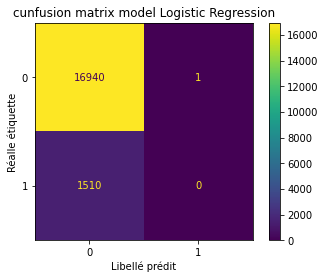

In [ ]:
# create Logistic Regression model and generate predictions
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

y_lr_pred_proba=lr.predict_proba(X_test) #Calcul de la proba d'appartenance àchaque classe 
y_pred_lr=np.where(y_lr_pred_proba>0.5,1,0)[:,1] #Calcul de la classe d'appartenance (seuil 0.5)
 
accuracy_score_lr = accuracy_score(y_test, y_pred_lr)
roc_auc_lr= roc_auc_score(y_test,y_lr_pred_proba[:,1])
f1_score_lr = f1_score(y_test, y_pred_lr)
recall_score_lr = recall_score(y_test, y_pred_lr)

#Printing accuracy scores, roc_auc, F1, recall
print('The confusion matrix is:', confusion_matrix(y_test, y_pred_lr))
print('The accuracy for mode model is:', accuracy_score_lr)
print('The roc_auc score for the model model is:',roc_auc_lr)
print('The f1 score for the model model is:',f1_score_lr)
print("The recall score" , recall_score_lr)

#Ploting the cunfusion matrix
plt.figure(figsize = (5,5))
plot_confusion_matrix(lr, X_test, y_test, cmap='viridis')
plt.title('cunfusion matrix model Logistic Regression')
plt.xlabel('Libellé prédit')
plt.ylabel('Réalle étiquette')
plt.show()

### Xgboost

The confusion matrix is: [[16939     2]
 [ 1498    12]]
The accuracy for mode model is: 0.9187035933011761
The roc_auc score for the model model is: 0.7584632055700912
The f1 score for the model model is: 0.015748031496062992
The recall score 0.007947019867549669


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



<Figure size 360x360 with 0 Axes>

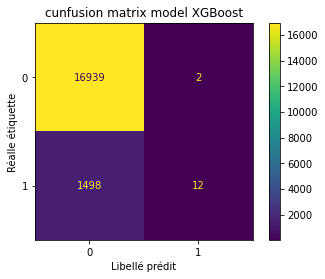

In [ ]:
# create Xgboost model and generate predictions
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

y_xgb_pred_proba=xgb.predict_proba(X_test) #Calcul de la proba d'appartenance àchaque classe 
y_pred_xgb=np.where(y_xgb_pred_proba>0.5,1,0)[:,1] #Calcul de la classe d'appartenance (seuil 0.5)

accuracy_score_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb= roc_auc_score(y_test,y_xgb_pred_proba[:,1])
f1_score_xgb = f1_score(y_test, y_pred_xgb)
recall_score_xgb = recall_score(y_test, y_pred_xgb)

#Printing accuracy scores, roc_auc, F1, recall
print('The confusion matrix is:', confusion_matrix(y_test, y_pred_xgb))
print('The accuracy for mode model is:', accuracy_score_xgb)
print('The roc_auc score for the model model is:',roc_auc_xgb)
print('The f1 score for the model model is:',f1_score_xgb)
print("The recall score" ,recall_score_xgb)

#Ploting the cunfusion matrix
plt.figure(figsize = (5,5))
plot_confusion_matrix(xgb, X_test, y_test, cmap='viridis')
plt.title('cunfusion matrix model XGBoost')
plt.xlabel('Libellé prédit')
plt.ylabel('Réalle étiquette')
plt.show()

### LGBM

The confusion matrix is: [[16900    41]
 [ 1471    39]]
The accuracy for mode model is: 0.9180532220475855
The roc_auc score for the model model is: 0.7584553481482872
The f1 score for the model model is: 0.04905660377358491
The recall score 0.025827814569536423


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



<Figure size 360x360 with 0 Axes>

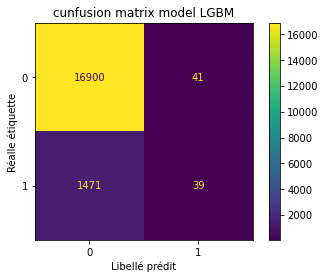

In [ ]:

# create LGBM model and generate predictions
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

y_lgbm_pred_proba=lgbm.predict_proba(X_test) #Calcul de la proba d'appartenance àchaque classe 
y_pred_lgbm=np.where(y_lgbm_pred_proba>0.5,1,0)[:,1] #Calcul de la classe d'appartenance (seuil 0.5)

accuracy_score_lgbm = accuracy_score(y_test, y_pred_lgbm)
roc_auc_lgbm= roc_auc_score(y_test,y_lgbm_pred_proba[:,1])
f1_score_lgbm = f1_score(y_test, y_pred_lgbm)
recall_score_lgbm = recall_score(y_test, y_pred_lgbm)

#Printing accuracy scores, roc_auc, F1, recall
print('The confusion matrix is:', confusion_matrix(y_test, y_pred_lgbm))
print('The accuracy for mode model is:', accuracy_score_lgbm)
print('The roc_auc score for the model model is:',roc_auc_lgbm)
print('The f1 score for the model model is:',f1_score_lgbm)
print("The recall score" ,recall_score_lgbm)

#Ploting the cunfusion matrix
plt.figure(figsize = (5,5))
plot_confusion_matrix(lgbm, X_test, y_test, cmap='viridis')
plt.title('cunfusion matrix model LGBM')
plt.xlabel('Libellé prédit')
plt.ylabel('Réalle étiquette')
plt.show()

### Catboost

Learning rate set to 0.064654
0:	learn: 0.6294335	total: 99.2ms	remaining: 1m 39s
1:	learn: 0.5759228	total: 141ms	remaining: 1m 10s
2:	learn: 0.5284078	total: 194ms	remaining: 1m 4s
3:	learn: 0.4883699	total: 242ms	remaining: 1m
4:	learn: 0.4541770	total: 291ms	remaining: 57.9s
5:	learn: 0.4256859	total: 352ms	remaining: 58.3s
6:	learn: 0.4028420	total: 412ms	remaining: 58.5s
7:	learn: 0.3818126	total: 456ms	remaining: 56.5s
8:	learn: 0.3635007	total: 509ms	remaining: 56.1s
9:	learn: 0.3486166	total: 557ms	remaining: 55.2s
10:	learn: 0.3353853	total: 621ms	remaining: 55.8s
11:	learn: 0.3248162	total: 672ms	remaining: 55.4s
12:	learn: 0.3163066	total: 728ms	remaining: 55.2s
13:	learn: 0.3080925	total: 776ms	remaining: 54.6s
14:	learn: 0.3020562	total: 838ms	remaining: 55s
15:	learn: 0.2955963	total: 895ms	remaining: 55s
16:	learn: 0.2909417	total: 937ms	remaining: 54.2s
17:	learn: 0.2869077	total: 985ms	remaining: 53.7s
18:	learn: 0.2824468	total: 1.05s	remaining: 54.2s
19:	learn: 0.27

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



<Figure size 360x360 with 0 Axes>

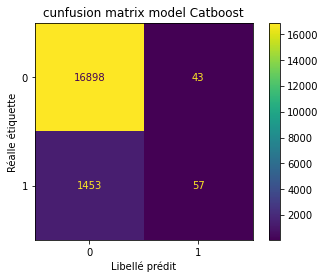

In [ ]:
# create Catboost model and generate predictions
cb = CatBoostClassifier()
cb.fit(X_train, y_train)
y_pred_cb = cb.predict(X_test)

y_cb_pred_proba=cb.predict_proba(X_test) #Calcul de la proba d'appartenance àchaque classe 
y_pred_cb=np.where(y_cb_pred_proba>0.5,1,0)[:,1] #Calcul de la classe d'appartenance (seuil 0.5)

accuracy_score_cb = accuracy_score(y_test, y_pred_cb)
roc_auc_cb= roc_auc_score(y_test,y_cb_pred_proba[:,1])
f1_score_cb = f1_score(y_test, y_pred_cb)
recall_score_cb = recall_score(y_test, y_pred_cb)

#Printing accuracy scores, roc_auc, F1, recall
print('The confusion matrix is:', confusion_matrix(y_test, y_pred_cb))
print('The accuracy for mode model is:', accuracy_score_cb)
print('The roc_auc score for the model model is:',roc_auc_cb)
print('The f1 score for the model  is:',f1_score_cb)
print("The recall score"  ,recall_score_cb)

#Ploting the cunfusion matrix
plt.figure(figsize = (5,5))
plot_confusion_matrix(cb, X_test, y_test, cmap='viridis')
plt.title('cunfusion matrix model Catboost')
plt.xlabel('Libellé prédit')
plt.ylabel('Réalle étiquette')
plt.show()

# Tableau des performances avec échantillonnage des individus de 30%

In [ ]:
#Résultats avec échantillonnage des individus de 30%

model_eval = pd.DataFrame({'model_name':['Dummy','DecisionTree','Random Forest', 'Logistic Regression', 'Xgboost', 'LGBM', 'Catboost'],
                    'accuracy_score':[accuracy_score_dummy.round(3), accuracy_score_dtc.round(3), accuracy_score_rfc.round(3), accuracy_score_lr.round(3),accuracy_score_xgb.round(3),accuracy_score_lgbm.round(3),accuracy_score_cb.round(3)],
                    'roc_auc_score': [roc_auc_dummy.round(3), roc_auc_dtc.round(3), roc_auc_rfc.round(3), roc_auc_lr.round(3),roc_auc_xgb.round(3),roc_auc_lgbm.round(3),roc_auc_cb.round(3)],
                    'F1_score': [f1_score_dummy.round(3), f1_score_dtc.round(3), f1_score_rfc.round(3), f1_score_lr.round(3),f1_score_xgb.round(3), f1_score_lgbm.round(3), f1_score_cb.round(3)],
                    'recall':[recall_score_dummy.round(3), recall_score_dtc.round(3), recall_score_rfc.round(3), recall_score_lr.round(3),recall_score_xgb.round(3), recall_score_lgbm.round(3) ,recall_score_cb.round(3)]})
model_eval

,model_name,accuracy_score,roc_auc_score,F1_score,recall
0,Dummy,0.918,0.500,0.000,0.000
1,DecisionTree,0.848,0.537,0.151,0.165
2,Random Forest,0.918,0.707,0.001,0.001
3,Logistic Regression,0.918,0.625,0.000,0.000
4,Xgboost,0.919,0.758,0.016,0.008
5,LGBM,0.918,0.758,0.049,0.026
6,Catboost,0.919,0.765,0.071,0.038


Text(0, 0.5, 'Metric accuracy score')

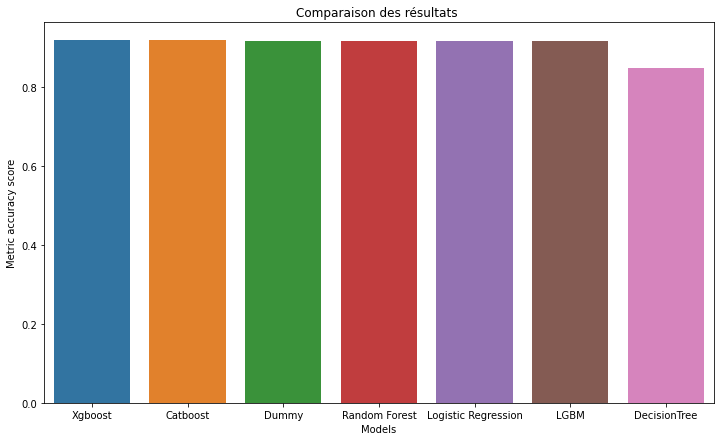

In [ ]:
sort_score = model_eval.sort_values('accuracy_score', ascending=False).head(8)

plt.figure(figsize = (12,7))
sns.barplot(x=sort_score['model_name'], y=sort_score['accuracy_score'])
plt.title('Comparaison des résultats ')
plt.xlabel('Models')
plt.ylabel('Metric accuracy score')

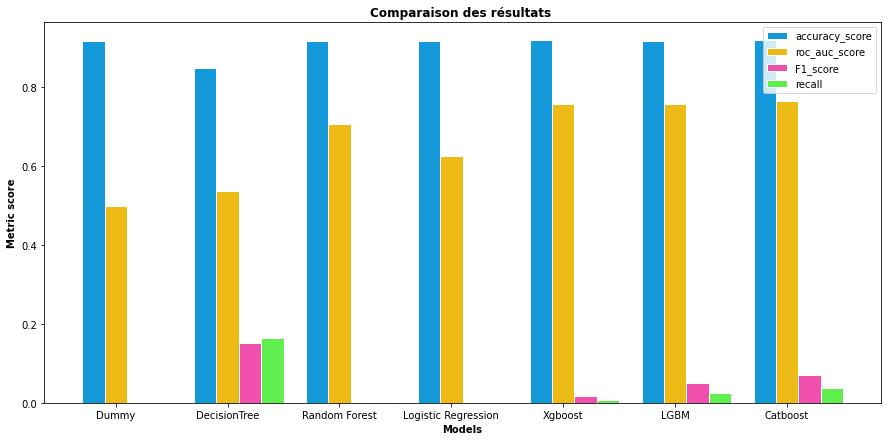

In [ ]:
# set width of bars
barWidth = 0.20
 
# set heights of bars

bars1 = model_eval['accuracy_score']
bars2 = model_eval['roc_auc_score']
bars3 = model_eval['F1_score']
bars4 = model_eval['recall']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

 
# Make the plot
fig, ax = plt.subplots(1, figsize=(15, 7))

plt.bar(r1, bars1, color='#1499db', width=barWidth, edgecolor='white', label='accuracy_score')
plt.bar(r2, bars2, color='#edbb15', width=barWidth, edgecolor='white', label='roc_auc_score')
plt.bar(r3, bars3, color='#f04fad', width=barWidth, edgecolor='white', label='F1_score')
plt.bar(r4, bars4, color='#5ff04f', width=barWidth, edgecolor='white', label='recall')
 

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Dummy','DecisionTree','Random Forest', 'Logistic Regression', 'Xgboost', 'LGBM', 'Catboost'])
 
# Create legend & Show graphic
plt.title('Comparaison des résultats ', fontweight='bold')
plt.xlabel('Models')
plt.ylabel('Metric score', fontweight='bold')
plt.legend()
plt.show()

## Résultat de modélisation:
 les 3 meillures modèles sont XGBoost et LGBM et CatBoost 

In [ ]:
# Pipeline de standardisation et d'imputation des valeurs manquantes
var_pipeline = Pipeline([ ('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler()),])

# Pipeline de transformations + classification
def define_pipeline(preprocessor, model) :
    pipe = Pipeline([("preprocess", preprocessor), ("regressor", model) ])
    return pipe

    
models = {'Dummy Classifier': DummyClassifier(),
          'DecisionTree' : DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(),
          'Logistic Regression':LogisticRegression(),
          'Xgboost': XGBClassifier(),
          'LGBM': LGBMClassifier(),
          'Catboost': CatBoostClassifier()
            }


In [ ]:

# Fonction pour afficher la courbe ROC pour les différents modèles testés

def plot_roc_curve(models, var_pipeline, X, y, n_splits=5, fit=True):
    fig, ax = plt.subplots(1, figsize=(10, 7))
    kf = KFold(n_splits=n_splits)    
    for name_clf, clf in models.items():
        print(name_clf)
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)
        for i, (train, test) in enumerate(kf.split(X, y)):

            full_pipeline = define_pipeline(var_pipeline, clf)
            
            if fit :
                full_pipeline.fit(X.iloc[train, :], y.iloc[train])

            y_pred_grd = full_pipeline.predict_proba(X.iloc[test, :])[:, 1]
            fpr, tpr, _ = roc_curve(y.iloc[test], y_pred_grd)

            interp_tpr = np.interp(mean_fpr, fpr, tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            auc_ = auc(fpr, tpr)

            aucs.append(auc_)

        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        plt.plot(mean_fpr, mean_tpr,
            label=name_clf + r'(AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2,
            alpha=.8)

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title('caractéristique de fonctionnement du récepteur')
    plt.legend(loc="lower right")
    plt.show()

Dummy Classifier
DecisionTree
Random Forest
Logistic Regression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
4:	learn: 0.4550265	total: 253ms	remaining: 50.3s
5:	learn: 0.4268829	total: 298ms	remaining: 49.4s
6:	learn: 0.4040770	total: 343ms	remaining: 48.7s
7:	learn: 0.3828996	total: 393ms	remaining: 48.8s
8:	learn: 0.3642745	total: 445ms	remaining: 49s
9:	learn: 0.3489336	total: 495ms	remaining: 49s
10:	learn: 0.3365941	total: 542ms	remaining: 48.8s
11:	learn: 0.3270732	total: 590ms	remaining: 48.6s
12:	learn: 0.3183600	total: 639ms	remaining: 48.5s
13:	learn: 0.3096082	total: 694ms	remaining: 48.8s
14:	learn: 0.3020063	total: 742ms	remaining: 48.7s
15:	learn: 0.2962858	total: 800ms	remaining: 49.2s
16:	learn: 0.2919796	total: 851ms	remaining: 49.2s
17:	learn: 0.2873090	total: 909ms	remaining: 49.6s
18:	learn: 0.2835593	total: 964ms	remaining: 49.8s
19:	learn: 0.2805155	total: 1.01s	remaining: 49.6s
20:	learn: 0.2772987	total: 1.06s	remaining: 49.5s
21:	learn: 0.2745763	total: 1.12s	remaining: 49.8s
22:	learn: 0.2

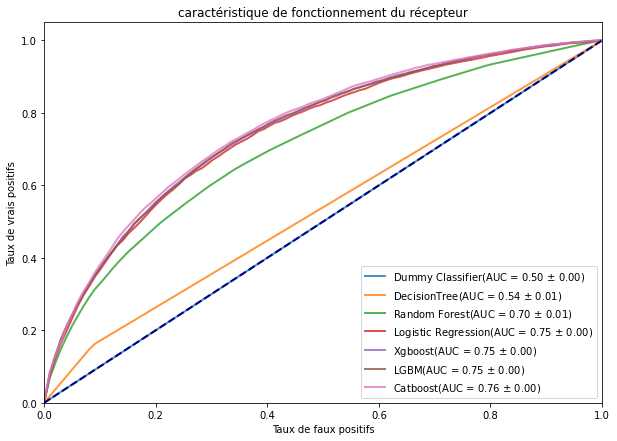

In [ ]:
# Appel à la fonction
plot_roc_curve(models,  var_pipeline, X, y)

# GridSearchCV et hyperparametres







### Hyperparametres Dummpy

In [ ]:

Dummy = DummyClassifier()
parametres_Dummy = {'strategy':['stratified', 'most_frequent', 'prior', 'uniform']}

Grid_dummyclassifier= GridSearchCV(estimator=Dummy, param_grid = parametres_Dummy, cv = 5, n_jobs=-1)
Grid_dummyclassifier.fit(X_train, y_train)

print(" Results from Grid Search DummyClassifier" )
print("\n The best estimator across ALL searched params:\n",Grid_dummyclassifier.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_dummyclassifier.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_dummyclassifier.best_params_)


results_gridSearch = []
results_gridSearch.append(['DummyClassifier', Grid_dummyclassifier.best_params_ ])

 Results from Grid Search DummyClassifier

 The best estimator across ALL searched params:
 DummyClassifier(strategy='most_frequent')

 The best score across ALL searched params:
 0.9195674862107337

 The best parameters across ALL searched params:
 {'strategy': 'most_frequent'}


### Hyperparametres DesionTree

In [ ]:
DecisionTree = DecisionTreeClassifier()

parameters_DecisionTree = {'criterion' : ['gini', 'entropy'],
                           'max_features' : ['sqrt', 'log2', None],
                           'max_depth':range(5,11,2)
 }

Grid_DecisionTree= GridSearchCV(estimator=DecisionTree, param_grid = parameters_DecisionTree, cv = 5, n_jobs=-1)
Grid_DecisionTree.fit(X_train, y_train)

print(" Results from Grid Search DecisionTree" )
print("\n The best estimator across ALL searched params:\n",Grid_DecisionTree.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_DecisionTree.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_DecisionTree.best_params_)


y_pred_DecisionTree = Grid_DecisionTree.predict(X_test)
results_gridSearch.append(['DecisionTree', Grid_DecisionTree.best_params_ ])

 Results from Grid Search DecisionTree

 The best estimator across ALL searched params:
 DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt')

 The best score across ALL searched params:
 0.9195674871287023

 The best parameters across ALL searched params:
 {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt'}


### Hyperparametres RandomForest

In [ ]:
RandomForest = RandomForestClassifier()

parameters_RandomForest = {"n_estimators": [100],
                           "bootstrap":[True],
                           "max_depth" : range(5,11,2)}

Grid_RandomForest= GridSearchCV(estimator=RandomForest, param_grid = parameters_RandomForest, cv = 5, n_jobs=-1)
Grid_RandomForest.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_RandomForest.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_RandomForest.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_RandomForest.best_params_)

y_pred_RandomForest = Grid_RandomForest.predict(X_test)
results_gridSearch.append(['RandomForest',  Grid_RandomForest.best_params_  ])

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=5)

 The best score across ALL searched params:
 0.9195674862107337

 The best parameters across ALL searched params:
 {'bootstrap': True, 'max_depth': 5, 'n_estimators': 100}


### Hyperparametres LogisticRegression

In [ ]:
LR = LogisticRegression()
parameters_LR = {'C':np.logspace(-4,0,5),
                 'penalty':["l1","l2"],
                 'max_iter':[200,400]}

Grid_LR= GridSearchCV(estimator=LR, param_grid = parameters_LR, cv = 5, n_jobs=-1)
Grid_LR.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", l

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                         'max_iter': [200, 400], 'penalty': ['l1', 'l2']})

In [ ]:

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_LR.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_LR.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_LR.best_params_)

y_pred_LR = Grid_LR.predict(X_test)
results_gridSearch.append(['LogisticRegression', Grid_LR.best_params_])


 Results from Grid Search 

 The best estimator across ALL searched params:
 LogisticRegression(C=0.0001, max_iter=200)

 The best score across ALL searched params:
 0.9195539360752324

 The best parameters across ALL searched params:
 {'C': 0.0001, 'max_iter': 200, 'penalty': 'l2'}


### Hyperparametres Xgboost

In [ ]:
XGB = XGBRegressor()

parameters_XGB = {'learning_rate': [0.05,  0.01, 0.1],
                 'max_depth': [5, 7, 10],
                 'n_estimators': [100]
 }
 
Grid_XGB= GridSearchCV(estimator=XGB, param_grid = parameters_XGB, cv = 5, n_jobs=-1)
Grid_XGB.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_XGB.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_XGB.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_XGB.best_params_)

y_pred_XGBoost = Grid_XGB.predict(X_test)
results_gridSearch.append(['XGB',  Grid_XGB.best_params_ ])

[17:19:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(max_depth=5)

 The best score across ALL searched params:
 0.07595428293911628

 The best parameters across ALL searched params:
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


### Hyperparametres LightGBPM 

In [ ]:
LGBM = LGBMClassifier()

parameters_LGBM = {'n_estimators': [100],
                  'learning_rate': np.logspace(-4,1,6), 
                  'max_depth': [5, 7, 10]
                 }
Grid_LGBM = GridSearchCV(estimator=LGBM, param_grid = parameters_LGBM, cv = 5, n_jobs=-1)
Grid_LGBM.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_LGBM.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_LGBM.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_LGBM.best_params_)


y_pred_LGBM = Grid_LGBM.predict(X_test)
results_gridSearch.append(['LGBM', Grid_LGBM.best_params_ ])

 Results from Grid Search 

 The best estimator across ALL searched params:
 LGBMClassifier(max_depth=5)

 The best score across ALL searched params:
 0.919608132945363

 The best parameters across ALL searched params:
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


### Hyperparametres CatboostClassifier

In [ ]:
CBC = CatBoostClassifier()

parameters_CBC = {'depth' : range(5,11,2),
                 'learning_rate' : [0.01,0.02],
                  'iterations' : [20,50,100]
                 }

Grid_CBC = GridSearchCV(estimator=CBC, param_grid = parameters_CBC, cv = 5, n_jobs=-1)
Grid_CBC.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)


y_pred_CatBoost = Grid_CBC.predict(X_test)
results_gridSearch.append(['CatBoost', Grid_CBC.best_params_ ])

0:	learn: 0.6829229	total: 67.9ms	remaining: 1.29s
1:	learn: 0.6729632	total: 108ms	remaining: 976ms
2:	learn: 0.6626652	total: 156ms	remaining: 881ms
3:	learn: 0.6531000	total: 195ms	remaining: 782ms
4:	learn: 0.6437459	total: 235ms	remaining: 706ms
5:	learn: 0.6346425	total: 284ms	remaining: 664ms
6:	learn: 0.6257828	total: 322ms	remaining: 598ms
7:	learn: 0.6172224	total: 358ms	remaining: 537ms
8:	learn: 0.6080458	total: 403ms	remaining: 492ms
9:	learn: 0.5998690	total: 446ms	remaining: 446ms
10:	learn: 0.5915624	total: 492ms	remaining: 403ms
11:	learn: 0.5834595	total: 533ms	remaining: 355ms
12:	learn: 0.5758336	total: 579ms	remaining: 312ms
13:	learn: 0.5683725	total: 622ms	remaining: 266ms
14:	learn: 0.5610990	total: 666ms	remaining: 222ms
15:	learn: 0.5537727	total: 708ms	remaining: 177ms
16:	learn: 0.5469256	total: 746ms	remaining: 132ms
17:	learn: 0.5403136	total: 783ms	remaining: 87ms
18:	learn: 0.5332737	total: 827ms	remaining: 43.5ms
19:	learn: 0.5269168	total: 865ms	remain

In [ ]:
result_Grid = pd.DataFrame(results_gridSearch,columns=['model', 'best_param' ])
result_Grid

,model,best_param
0,DummyClassifier,{'strategy': 'most_frequent'}
1,DecisionTree,"{'criterion': 'entropy', 'max_depth': 5, 'max_..."
2,RandomForest,"{'bootstrap': True, 'max_depth': 5, 'n_estimat..."
3,LogisticRegression,"{'C': 0.0001, 'max_iter': 200, 'penalty': 'l2'}"
4,XGB,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
5,LGBM,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
6,CatBoost,"{'depth': 5, 'iterations': 20, 'learning_rate'..."


## Ré-equilibration des classes cible
Les données du jeu d'entraînement sont déséquilibrées : environ 92 % de "TARGET = 0" pour 8 % de "TARGET = 1"

nous avons un jeu de donnée déséquilibré , Le SMOTE est une technique très utile pour rééquilibrer les données numériques en entrée d’un modèle de Machine Learning. Il permet d’éviter le surapprentissage du modèle en densifiant les individus minoritaires de façon homogène et peut améliorer significativement les performances de vos modèles. il est indispensable de se souvenir des cinq règles suivantes :

Les paramètres optimaux du SMOTE dépendent de vos données et doivent donc être optimisés. Le plus simple est de les optimiser en même temps que votre modèle. Les variables numériques doivent être normalisées. Les variables discrètes doivent être retraitées entre le SMOTE et le modèle. Les variables catégorielles doivent être conservées telles quelles et ne pas être encodées. Le SMOTE est réservé à l’entraînement du modèle et ne doit surtout pas être appliqué aux données de validation et de test.

0    91.93
1     8.07
Name: TARGET, dtype: float64


Text(0.5, 1.0, 'Répartion de la valeur TARGET')

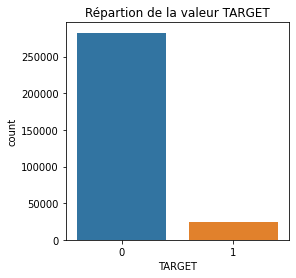

In [ ]:
print(round(df.TARGET.value_counts(normalize = True),4)*100)
plt.rcParams["figure.figsize"] = (4, 4)
sns.countplot(data = df, x = "TARGET")
plt.title("Répartion de la valeur TARGET")

In [ ]:
#smote = SMOTE() 
#X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
'''note_0 = ((y_train_smote == 0).sum()*100/y_train_smote.shape)
print('TARGET[0] : %.3f' % note_0, '%')
note_1 = ((y_train_smote == 1).sum()*100/y_train_smote.shape)
print('TARGET[1] : %.3f' % note_1, '%')'''

In [ ]:
import time
from sklearn import preprocessing,impute,model_selection

 
Fonction permettant la recherche des meilleurs hyperparamètres d'un modèle puis 
    l'entrainement de ce modèle avec ces meilleurs paramètres sur le jeu X_train, y_train
    La fonction retourne les performances du modèle (Recall, F1_Score, ROC AUC et temps d'éxécution) et les meilleurs paramètres dans un tableau le paramètre 'hyperparam' de la fonction est un dictionnaire
    


In [ ]:
model_eval_balanced = pd.DataFrame(columns = ['ROC AUC_balanced','Recall_balanced','F1-Score_balanced',])


In [ ]:

def eval_perf(X_train,y_train,X_test,y_test,model,hyperparam):
   
    model_gridsearch=model_selection.GridSearchCV(estimator = model, param_grid=hyperparam,scoring='roc_auc')      # définition de la Cross-Validation
    model_gridsearch.fit(X_train, y_train) #Fit du modèle sur le jeu d'entrainement
    
    
    y_pred_proba=model_gridsearch.predict_proba(X_test) #Calcul de la proba d'appartenance àchaque classe 
    y_pred=np.where(y_pred_proba>0.5,1,0)[:,1] #Calcul de la classe d'appartenance (seuil 0.5)
    
    
    note_0 = ((y_pred == 0).sum()*100/y_pred.shape)
    note_1 = ((y_pred == 1).sum()*100/y_pred.shape)
    print('- TARGET[0] : %.3f' % note_0, '%')
    print('- TARGET[1] : %.3f' % note_1, '%')

    recall=round(metrics.recall_score(y_test,y_pred),4)  #calcul du Recall   
    f1=round(metrics.f1_score(y_test,y_pred),4)  #calcul du F1 Score
    roc_auc=round(metrics.roc_auc_score(y_test,y_pred_proba[:,1]),4) #Calcul du ROC_AUC

            
    model_eval_balanced.loc[str(model),:] = [roc_auc,recall,f1]

In [ ]:
dum = DummyClassifier()
eval_perf(X_train,y_train,X_test,y_test,dum,{'strategy':['most_frequent']})


- TARGET[0] : 100.000 %
- TARGET[1] : 0.000 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(class_weight='balanced')
eval_perf(X_train,y_train,X_test,y_test,dec_tree,{'criterion' : ['entropy'], 'max_depth': [5], 'max_features': ['sqrt']})


- TARGET[0] : 46.946 %
- TARGET[1] : 53.054 %


In [ ]:
rfc = RandomForestClassifier(class_weight='balanced')
eval_perf(X_train,y_train,X_test,y_test,rfc,{'bootstrap': [True], 'max_depth': [5], 'n_estimators': [100]})

- TARGET[0] : 65.568 %
- TARGET[1] : 34.432 %


In [ ]:
logreg = LogisticRegression(class_weight='balanced')
eval_perf(X_train,y_train,X_test,y_test,logreg,{'C': [ 0.0001], 'max_iter': [200], 'penalty': ['l2']})

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

- TARGET[0] : 59.672 %
- TARGET[1] : 40.328 %


In [ ]:
xgb = XGBClassifier(class_weight='balanced')
eval_perf(X_train,y_train,X_test,y_test,xgb,{'learning_rate': [0.1], 'max_depth': [5], 'n_estimators': [100]})

- TARGET[0] : 99.734 %
- TARGET[1] : 0.266 %


In [ ]:
lgbm = LGBMClassifier(class_weight='balanced')
eval_perf(X_train,y_train,X_test,y_test,lgbm,{'learning_rate': [0.1], 'max_depth': [5], 'n_estimators': [100]})

- TARGET[0] : 69.888 %
- TARGET[1] : 30.112 %


In [ ]:
from collections import Counter
counter = Counter(y_train)
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 11.433


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
 
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

In [ ]:
#scale_pos_weight='balanced'
catb = CatBoostClassifier(class_weight=class_weights)
eval_perf(X_train,y_train,X_test,y_test,catb,{'depth': [5], 'iterations': [20], 'learning_rate': [0.01]})

0:	learn: 0.6918136	total: 37.9ms	remaining: 719ms
1:	learn: 0.6907379	total: 73.9ms	remaining: 665ms
2:	learn: 0.6896291	total: 110ms	remaining: 624ms
3:	learn: 0.6885839	total: 146ms	remaining: 585ms
4:	learn: 0.6874703	total: 208ms	remaining: 624ms
5:	learn: 0.6864871	total: 261ms	remaining: 608ms
6:	learn: 0.6855962	total: 299ms	remaining: 554ms
7:	learn: 0.6844795	total: 354ms	remaining: 531ms
8:	learn: 0.6835623	total: 390ms	remaining: 477ms
9:	learn: 0.6823815	total: 434ms	remaining: 434ms
10:	learn: 0.6814438	total: 473ms	remaining: 387ms
11:	learn: 0.6804514	total: 511ms	remaining: 341ms
12:	learn: 0.6794219	total: 549ms	remaining: 295ms
13:	learn: 0.6785410	total: 585ms	remaining: 251ms
14:	learn: 0.6776394	total: 623ms	remaining: 208ms
15:	learn: 0.6767887	total: 661ms	remaining: 165ms
16:	learn: 0.6758709	total: 704ms	remaining: 124ms
17:	learn: 0.6751263	total: 757ms	remaining: 84.1ms
18:	learn: 0.6741983	total: 798ms	remaining: 42ms
19:	learn: 0.6732552	total: 836ms	remai

In [ ]:
#Résultats avec échantillonnage balancé des individus de 30%
model_eval_balanced

,ROC AUC_balanced,Recall_balanced,F1-Score_balanced
DummyClassifier(),0.5,0.0,0.0
DecisionTreeClassifier(class_weight='balanced'),0.6013,0.6748,0.1804
RandomForestClassifier(class_weight='balanced'),0.7336,0.6642,0.2551
LogisticRegression(class_weight='balanced'),0.616,0.5609,0.1893
XGBClassifier(class_weight='balanced'),0.763,0.0199,0.0385
LGBMClassifier(class_weight='balanced'),0.7575,0.6503,0.278
<catboost.core.CatBoostClassifier object at 0x7fdc7f6fc510>,0.7208,0.6656,0.2433


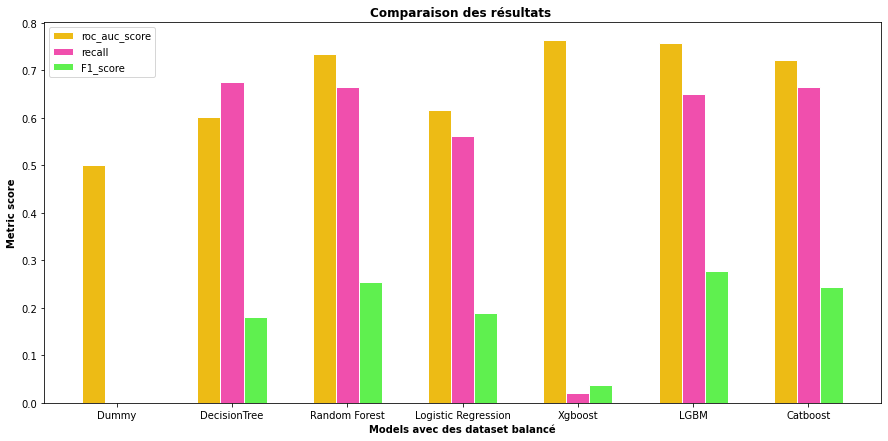

In [ ]:
# set width of bars
barWidth = 0.20
 
# set heights of bars

bars1 = model_eval_balanced['ROC AUC_balanced']
bars2 = model_eval_balanced['Recall_balanced']
bars3 = model_eval_balanced['F1-Score_balanced']

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]


 
# Make the plot
fig, ax = plt.subplots(1, figsize=(15, 7))

plt.bar(r1, bars1, color='#edbb15', width=barWidth, edgecolor='white', label='roc_auc_score')
plt.bar(r2, bars2, color='#f04fad', width=barWidth, edgecolor='white', label='recall')
plt.bar(r3, bars3, color='#5ff04f', width=barWidth, edgecolor='white', label='F1_score')
 

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Dummy','DecisionTree','Random Forest', 'Logistic Regression', 'Xgboost', 'LGBM', 'Catboost'])
 
# Create legend & Show graphic
plt.title('Comparaison des résultats ', fontweight='bold')
plt.xlabel('Models avec des dataset balancé')
plt.ylabel('Metric score', fontweight='bold')
plt.legend()
plt.show()

# Adaptation de la métrique au métier  pour les donneés équilibré
 Utilisation du fbeta score pour relancer la recherche des hyper paramètres.

### LightgbmClassifier et fbeta

In [ ]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)

grid_lgbm = GridSearchCV(LGBMClassifier(**{ 'objective': 'binary', 'n_jobs': -1, 'class_weight':'balanced','random_state':100}),
                         param_grid={'n_estimators': [100], 'learning_rate': np.logspace(-4,1,6), 'max_depth': [5, 7, 10]},
                         scoring=ftwo_scorer, error_score='raise')

grid_lgbm.fit(X_train, y_train)

y_lgbm_pred_proba=grid_lgbm.predict_proba(X_test) #Calcul de la proba d'appartenance àchaque classe 
y_pred_lgbm=np.where(y_lgbm_pred_proba>0.5,1,0)[:,1] #Calcul de la classe d'appartenance (seuil 0.5)

roc_auc_lgbm= roc_auc_score(y_test,y_lgbm_pred_proba[:,1])
f1_score_lgbm = f1_score(y_test, y_pred_lgbm)
recall_score_lgbm = recall_score(y_test, y_pred_lgbm)
fbeta_score_lgbm = fbeta_score(y_test, y_pred_lgbm, average='binary', beta=2)

lgbm_cv = pd.DataFrame(grid_lgbm.cv_results_)
lgbm_cv.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.763897,0.212525,0.338825,0.017944,0.0001,5,100,"{'learning_rate': 0.0001, 'max_depth': 5, 'n_e...",0.375,0.372934,0.384458,0.38519,0.369588,0.377434,0.006281,11


In [ ]:
results_cv = []

y_pred_lgbm = grid_lgbm.predict(X_test)
results_cv.append(['LGBMClassifier', grid_lgbm.best_params_,  roc_auc_lgbm.round(3),  f1_score_lgbm.round(3),  recall_score_lgbm.round(3),  fbeta_score_lgbm.round(3)])
results_cv

[['LGBMClassifier',
  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100},
  0.757,
  0.278,
  0.65,
  0.423]]

### CatboostClassifier et fbeta

In [ ]:
grid_catb = GridSearchCV(CatBoostClassifier(learning_rate=0.2, random_state=100, scale_pos_weight=11.319),
                         param_grid={'depth' : range(5,11,2),'learning_rate' : [0.01,0.02], 'iterations' : [20,50,100]}, 
                         scoring=ftwo_scorer, error_score='raise')
grid_catb.fit(X_train, y_train)

y_cb_pred_proba=grid_catb.predict_proba(X_test) #Calcul de la proba d'appartenance àchaque classe 
y_pred_cb=np.where(y_cb_pred_proba>0.5,1,0)[:,1] #Calcul de la classe d'appartenance (seuil 0.5)

roc_auc_cb= roc_auc_score(y_test,y_cb_pred_proba[:,1])
f1_score_cb = f1_score(y_test, y_pred_cb)
recall_score_cb = recall_score(y_test, y_pred_cb)
fbeta_score_cb = fbeta_score(y_test, y_pred_cb, average='binary', beta=2)

catb_cv = pd.DataFrame(grid_catb.cv_results_)
catb_cv.head()

In [ ]:

results_cv.append(['CatBoostClassifier',   grid_catb.best_params_, roc_auc_cb.round(3), f1_score_cb.round(3),  recall_score_cb.round(3),  fbeta_score_cb.round(3)  ])



In [ ]:
result_Grid2 = pd.DataFrame(results_cv,columns=['model', 'best_param_df1' ,'roc_auc_df1', 'f1_score_df1', 'recall_score_df1', 'fbeta_score_df1'])
result_Grid2

,model,best_param_df1,roc_auc_df1,f1_score_df1,recall_score_df1,fbeta_score_df1
0,LGBMClassifier,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.757,0.278,0.650,0.423
1,CatBoostClassifier,"{'depth': 9, 'iterations': 100, 'learning_rate...",0.750,0.267,0.664,0.416


# Ré-apprendre les meilleurs modèles sur le train set complet

In [ ]:
print('taille df sample 1: ',df_sample.shape)
print('taille X_train:', X_train.shape)
print('taille X_test:', X_test.shape)
print('taille y_train:', y.shape)
print('taille y_test:', y_test.shape)

taille df sample 1:  (92252, 253)
taille X_train: (73801, 252)
taille X_test: (18451, 252)
taille y_train: (92252,)
taille y_test: (18451,)


In [ ]:
df_sample2 = df.copy()
df_sample2[col] = cat_train
df_sample2 = df_sample2.sample(frac = 0.9) 

X2 = df_sample2.drop('TARGET', axis=1)
y2 = df_sample2['TARGET']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
df_sample2.head(5)

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
192160,322829,0,112500.0,234576.0,17667.0,202500.0,0.008625,21281,-1648.0,-10715.0,...,0,0,0,0,0,0,0,0,0,0
81540,194554,1,144000.0,124722.0,14071.5,117000.0,0.018634,14383,-729.0,-62.0,...,0,0,0,0,0,0,0,0,0,0
298816,446181,0,90000.0,388512.0,31149.0,360000.0,0.018801,13217,-1172.0,-1217.0,...,0,0,0,0,0,0,0,0,0,0
239865,377777,0,247500.0,270000.0,13500.0,270000.0,0.003813,10146,-879.0,-4683.0,...,0,0,0,0,0,0,1,0,1,0
197262,328721,0,360000.0,1971072.0,62019.0,1800000.0,0.010006,10688,-229.0,-5270.0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
print('taille df sample 2: ',df_sample2.shape)
print('taille X_train_2:', X_train_2.shape)
print('taille X_test_2:', X_test_2.shape)
print('taille y_train_2:', y_train_2.shape)
print('taille y_test_2:', y_test_2.shape)

taille df sample 2:  (276754, 253)
taille X_train_2: (221403, 252)
taille X_test_2: (55351, 252)
taille y_train_2: (221403,)
taille y_test_2: (55351,)


In [ ]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)

In [87]:
results_cv_2 = []
grid_lgbm_2 = GridSearchCV(LGBMClassifier(**{ 'objective': 'binary', 'n_jobs': -1, 'class_weight':'balanced','random_state':100}),
                         param_grid={'n_estimators': [100], 'learning_rate': np.logspace(-4,1,6), 'max_depth': [5, 7, 10]},
                         scoring=ftwo_scorer, error_score='raise')

grid_lgbm_2.fit(X_train_2, y_train_2)
y_pred_lgbm_2 = grid_lgbm_2.predict(X_test_2)


y_lgbm_pred_proba_2=grid_lgbm_2.predict_proba(X_test_2) #Calcul de la proba d'appartenance àchaque classe 
y_pred_lgbm_2=np.where(y_lgbm_pred_proba_2>0.5,1,0)[:,1] #Calcul de la classe d'appartenance (seuil 0.5)

roc_auc_lgbm= roc_auc_score(y_test_2,y_lgbm_pred_proba_2[:,1])
f1_score_lgbm = f1_score(y_test_2, y_pred_lgbm_2)
recall_score_lgbm = recall_score(y_test_2, y_pred_lgbm_2)
fbeta_score_lgbm = fbeta_score(y_test_2, y_pred_lgbm_2, average='binary', beta=2)

results_cv_2.append(['LGBMClassifier', grid_lgbm_2.best_params_,  roc_auc_lgbm.round(3), f1_score_lgbm.round(3),  recall_score_lgbm.round(3),  fbeta_score_lgbm.round(3)  ])

In [ ]:
grid_catb_2 = GridSearchCV(CatBoostClassifier(learning_rate=0.2, random_state=100, scale_pos_weight=11.319),
                         param_grid={'depth' : range(5,11,2),'learning_rate' : [0.01,0.02], 'iterations' : [20,50,100]}, 
                         scoring=ftwo_scorer, error_score='raise')
grid_catb_2.fit(X_train_2, y_train_2)

y_pred_catb_2 = grid_catb_2.predict(X_test_2)


y_cb_pred_proba_2=grid_catb_2.predict_proba(X_test_2) #Calcul de la proba d'appartenance àchaque classe 
y_pred_cb_2=np.where(y_cb_pred_proba_2>0.5,1,0)[:,1] #Calcul de la classe d'appartenance (seuil 0.5)

roc_auc_cb= roc_auc_score(y_test_2,y_cb_pred_proba_2[:,1])
f1_score_cb = f1_score(y_test_2, y_pred_cb_2)
recall_score_cb = recall_score(y_test_2, y_pred_cb_2)
fbeta_score_cb = fbeta_score(y_test_2, y_pred_cb_2, average='binary', beta=2)

results_cv_2.append(['CatBoostClassifier', grid_catb_2.best_params_, roc_auc_cb.round(3),f1_score_cb.round(3),recall_score_cb.round(3),fbeta_score_cb.round(3) ])



0:	learn: 0.6918466	total: 105ms	remaining: 1.99s
1:	learn: 0.6905580	total: 197ms	remaining: 1.77s
2:	learn: 0.6892599	total: 299ms	remaining: 1.69s
3:	learn: 0.6879551	total: 401ms	remaining: 1.6s
4:	learn: 0.6867035	total: 500ms	remaining: 1.5s
5:	learn: 0.6856263	total: 588ms	remaining: 1.37s
6:	learn: 0.6844472	total: 691ms	remaining: 1.28s
7:	learn: 0.6833050	total: 775ms	remaining: 1.16s
8:	learn: 0.6821872	total: 869ms	remaining: 1.06s
9:	learn: 0.6811497	total: 969ms	remaining: 969ms
10:	learn: 0.6799758	total: 1.05s	remaining: 862ms
11:	learn: 0.6789801	total: 1.14s	remaining: 761ms
12:	learn: 0.6779352	total: 1.24s	remaining: 666ms
13:	learn: 0.6769918	total: 1.35s	remaining: 578ms
14:	learn: 0.6759919	total: 1.43s	remaining: 477ms
15:	learn: 0.6750530	total: 1.53s	remaining: 383ms
16:	learn: 0.6740833	total: 1.62s	remaining: 287ms
17:	learn: 0.6731585	total: 1.71s	remaining: 190ms
18:	learn: 0.6721545	total: 1.8s	remaining: 95ms
19:	learn: 0.6712748	total: 1.9s	remaining: 0

In [91]:
Grid_result_2 = pd.DataFrame(results_cv_2,columns=['model', 'best_param_df2' ,'roc_auc_df2', 'f1_score_df2', 'recall_score_df2', 'fbeta_score_df2'])
Grid_result_2

,model,best_param_df2,roc_auc_df2,f1_score_df2,recall_score_df2,fbeta_score_df2
0,LGBMClassifier,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.764,0.275,0.676,0.427
1,CatBoostClassifier,"{'depth': 9, 'iterations': 100, 'learning_rate...",0.748,0.263,0.673,0.414


# Rechercher le seuil de décision

In [ ]:
def seuil(X_train_2,y_train_2,X_test_2,y_test_2,model,bestparam):
    
    '''Fonction permettant de calculer le fbeta_score pour différent seuils de décision entre 0 et 1.
    La fonction retourne la liste des scores pour chacun de ces seuils (100 seuils entre 0 et 1).
    La fonction retourne également l'importance des features    
    '''
    
    fbeta_list=[]
    scorer=metrics.make_scorer(metrics.fbeta_score,beta=2)
    model_gs=GridSearchCV(estimator = model, param_grid=bestparam,scoring=scorer)      # définition de la Cross-Validation
    model_gs.fit(X_train_2, y_train_2) #Fit du modèle sur le jeu d'entrainement
    y_pred_proba_2=model_gs.predict_proba(X_test_2) #Calcul de la proba d'appartenance àchaque classe 
        
    for i in np.linspace(0,1,101):        
        y_pred_2=np.where(y_pred_proba_2>i,1,0)[:,1] #Calcul de la classe d'appartenance (seuil variable)
        fbeta=round(metrics.fbeta_score(y_test_2,y_pred_2,beta=2),4)
        fbeta_list.append(fbeta)
        
    return fbeta_list,model_gs

In [ ]:
lgbm=LGBMClassifier(class_weight='balanced')
fbeta_list_lgbm,lgbm=seuil(X_train_2,y_train_2,X_test_2,y_test_2,lgbm,{'learning_rate': [0.1],'max_depth': [7],'n_estimators': [100]})

In [ ]:
catb=CatBoostClassifier(scale_pos_weight=11.319)
fbeta_list_catb,catb=seuil(X_train_2,y_train_2,X_test_2,y_test_2,catb,{'depth': [9], 'iterations': [100], 'learning_rate': [0.02]})

Affichage de l'évolution du score selon le seuil

In [ ]:
df_seuil=pd.DataFrame({'seuil':np.linspace(0,1,101),'fbeta_catb':fbeta_list_catb,'fbeta_lgbm':fbeta_list_lgbm})


Text(0, 0.5, 'F-beta score')

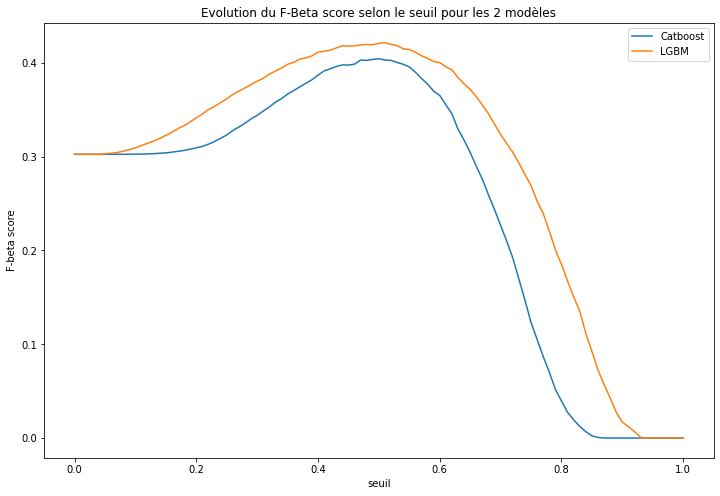

In [ ]:
plt.figure(figsize = (12, 8))
sns.lineplot(data=df_seuil,x='seuil',y='fbeta_catb',label='Catboost');
sns.lineplot(data=df_seuil,x='seuil',y='fbeta_lgbm',label='LGBM');
plt.title('Evolution du F-Beta score selon le seuil pour les 2 modèles');
plt.ylabel('F-beta score')

In [ ]:
print('Score max LGBM:',df_seuil['fbeta_lgbm'].max())
print('Seuil pour score max LGBM:', df_seuil.loc[df_seuil['fbeta_lgbm'].idxmax(),'seuil'])

Score max LGBM: 0.4215
Seuil pour score max LGBM: 0.51


In [ ]:
print('Score max Catboost:',df_seuil['fbeta_catb'].max())
print('Seuil pour score max Catboost:', df_seuil.loc[df_seuil['fbeta_catb'].idxmax(),'seuil'])


Score max Catboost: 0.4043
Seuil pour score max Catboost: 0.5


# Interprétabilité du meilleur modèle

*   feature importance
*   summary plot
*   force plot





## Feature importances

In [ ]:
lgbm2 = LGBMClassifier(**{'objective': 'binary', 'n_jobs': -1, 'class_weight':'balanced','random_state':100 , 
                          'learning_rate': 0.1,'max_depth': 7,'n_estimators': 100})
lgbm2.fit(X_train_2, y_train_2)
importance_lgbm = lgbm2.feature_importances_
importance_lgbm2 = importance_lgbm[importance_lgbm >= 55]


In [ ]:
col = X_train_2.columns
for i,v in enumerate(importance_lgbm):
	if v >= 55 :
		print('Colonne : %s, Score : %.5f' % (col[i],v))
  
print('Feature importances lgbm : ', importance_lgbm2)


Colonne : AMT_CREDIT, Score : 75.00000
Colonne : AMT_ANNUITY, Score : 89.00000
Colonne : AMT_GOODS_PRICE, Score : 84.00000
Colonne : DAYS_BIRTH, Score : 134.00000
Colonne : DAYS_EMPLOYED, Score : 78.00000
Colonne : DAYS_REGISTRATION, Score : 60.00000
Colonne : DAYS_ID_PUBLISH, Score : 82.00000
Colonne : EXT_SOURCE_1, Score : 223.00000
Colonne : EXT_SOURCE_2, Score : 180.00000
Colonne : EXT_SOURCE_3, Score : 197.00000
Colonne : DAYS_LAST_PHONE_CHANGE, Score : 61.00000
Colonne : INCOME_TO_ANNUITY_RATIO_BY_AGE, Score : 63.00000
Colonne : CREDIT_INCOME_PERCENT, Score : 55.00000
Colonne : CREDIT_TERM, Score : 284.00000
Colonne : DAYS_EMPLOYED_PERCENT, Score : 71.00000
Feature importances lgbm :  [ 75  89  84 134  78  60  82 223 180 197  61  63  55 284  71]


In [ ]:
col_important = pd.DataFrame({'feature':['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
                                         'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE',
                                         'INCOME_TO_ANNUITY_RATIO_BY_AGE','CREDIT_INCOME_PERCENT','CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT'], 'col_score': importance_lgbm2 })
col_important

,feature,col_score
0,AMT_CREDIT,75
1,AMT_ANNUITY,89
2,AMT_GOODS_PRICE,84
3,DAYS_BIRTH,134
4,DAYS_EMPLOYED,78
5,DAYS_REGISTRATION,60
6,DAYS_ID_PUBLISH,82
7,EXT_SOURCE_1,223
8,EXT_SOURCE_2,180
9,EXT_SOURCE_3,197


Text(0, 0.5, 'features score')

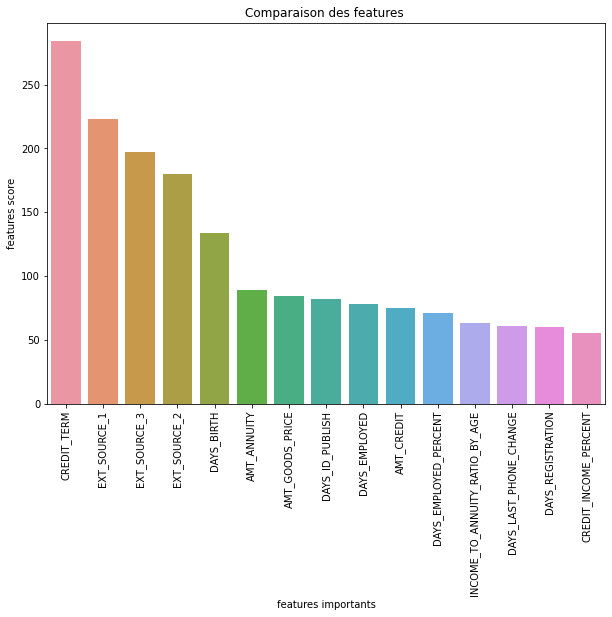

In [ ]:
sort_score_col = col_important.sort_values('col_score', ascending=False).head(20)
plt.figure(figsize = (10,7))
sns.barplot(x=sort_score_col['feature'], y=sort_score_col['col_score'])
plt.title('Comparaison des features ')
plt.xlabel('features importants')
plt.xticks(rotation=90)
plt.ylabel('features score')

## summary plot / Shap
La méthode des SHAP values permet de quantifier l'impact positif ou négatif des différentes features sur les individus



In [ ]:
import shap

In [ ]:
shap.initjs();


In [ ]:
# Calcul des valeurs SHAP permettant de visualiser l'impact des features sur chaque individu
df_X_test = pd.DataFrame(data=X_test_2,columns=X.columns)
explainer = shap.TreeExplainer(lgbm.best_estimator_)
shap_values = explainer.shap_values(df_X_test)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [ ]:
shap_values

[array([[ 8.22180452e-04,  6.37616214e-05,  4.06570994e-04, ...,
          0.00000000e+00,  1.63041071e-03,  0.00000000e+00],
        [-1.17833404e-02,  6.37616214e-05,  9.18901439e-04, ...,
          0.00000000e+00,  8.95638989e-03,  0.00000000e+00],
        [-7.70854426e-03, -6.08030361e-04,  9.91727154e-03, ...,
          0.00000000e+00,  5.46525768e-03,  0.00000000e+00],
        ...,
        [-2.77044224e-03,  2.05045346e-05, -1.19261850e-02, ...,
          0.00000000e+00,  5.47796695e-03,  0.00000000e+00],
        [ 1.73776252e-02, -5.17350024e-04,  1.43156757e-02, ...,
          0.00000000e+00, -2.82980053e-03,  0.00000000e+00],
        [-1.48299417e-02, -4.55676985e-04,  2.51044869e-02, ...,
          0.00000000e+00,  1.62277608e-03,  0.00000000e+00]]),
 array([[-8.22180452e-04, -6.37616214e-05, -4.06570994e-04, ...,
          0.00000000e+00, -1.63041071e-03,  0.00000000e+00],
        [ 1.17833404e-02, -6.37616214e-05, -9.18901439e-04, ...,
          0.00000000e+00, -8.95638989e

## summary plot pour modèl LGBM
Expliquer le modèl lightgbm avec shap

features : 'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE','INCOME_TO_ANNUITY_RATIO_BY_AGE','CREDIT_INCOME_PERCENT','CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT'

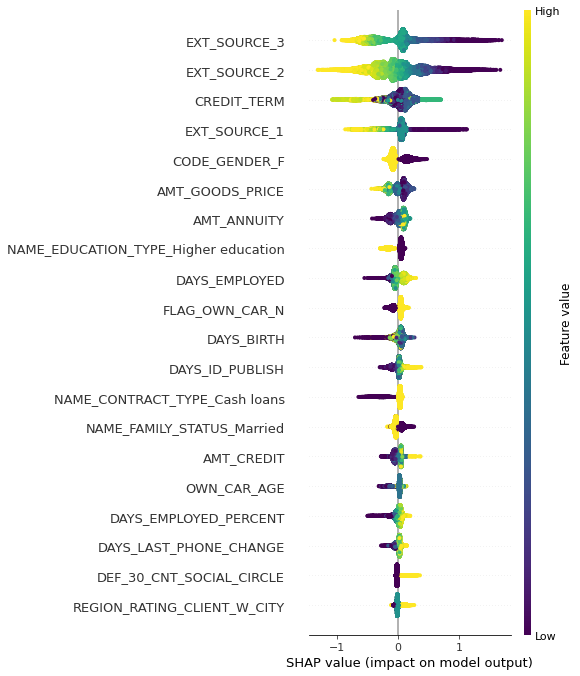

In [ ]:
shap.summary_plot(shap_values[1], df_X_test, cmap = "viridis")

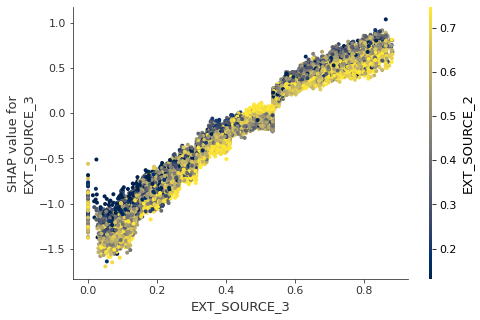

In [ ]:
shap.dependence_plot("EXT_SOURCE_3", shap_values[0], df_X_test, cmap = "cividis")

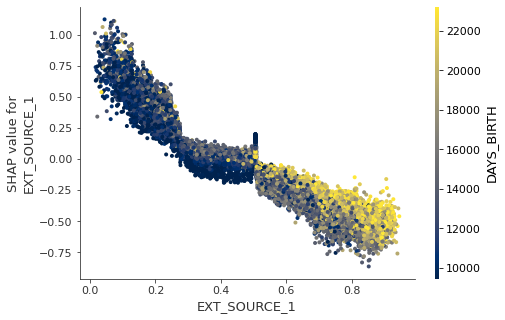

In [ ]:
shap.dependence_plot("EXT_SOURCE_1", shap_values[1], df_X_test, cmap = "cividis")

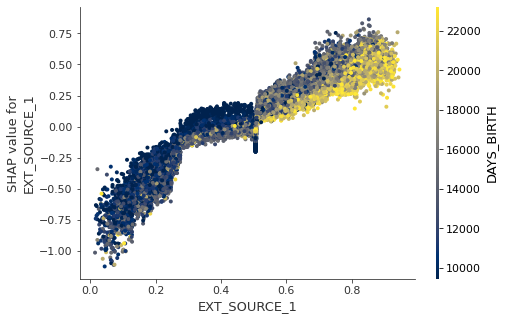

In [ ]:
shap.dependence_plot("EXT_SOURCE_1", shap_values[0], df_X_test, cmap = "cividis")

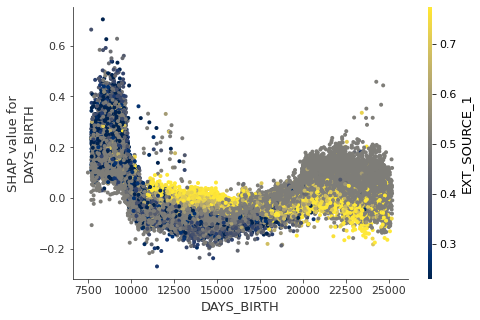

In [ ]:
shap.dependence_plot("DAYS_BIRTH", shap_values[0], df_X_test, cmap = "cividis")

In [ ]:
df_sample2['DAYS_EMPLOYED'].describe()

count    276754.000000
mean      -2252.577975
std        2137.910238
min      -17912.000000
25%       -2761.000000
50%       -1648.000000
75%        -933.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
df_sample2['DAYS_EMPLOYED'].hist()

In [ ]:
y[X['DAYS_EMPLOYED'] <= 0].describe()

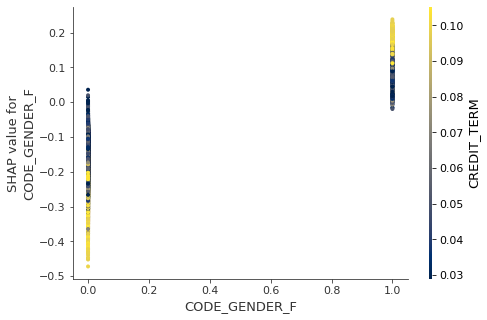

In [ ]:
shap.dependence_plot("CODE_GENDER_F", shap_values[0], df_X_test, cmap = "cividis")

In [ ]:
df_sample2['CODE_GENDER_F'].value_counts()

1    182290
0     94464
Name: CODE_GENDER_F, dtype: int64

## force plot

In [ ]:
print(len(shap_values))

2


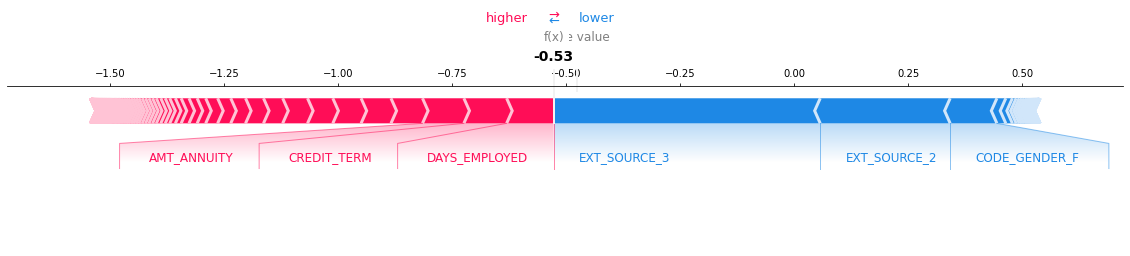

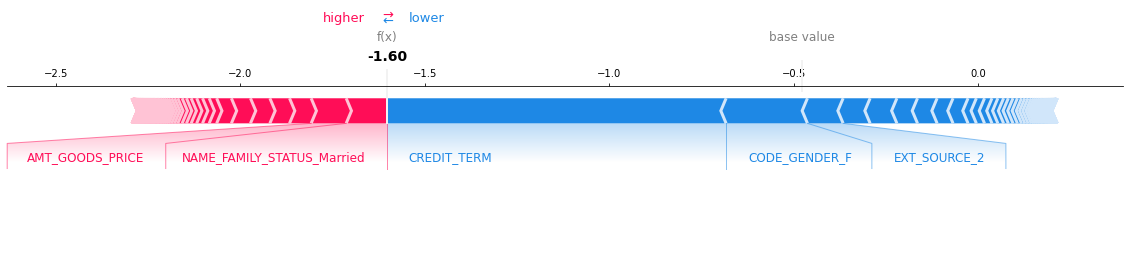

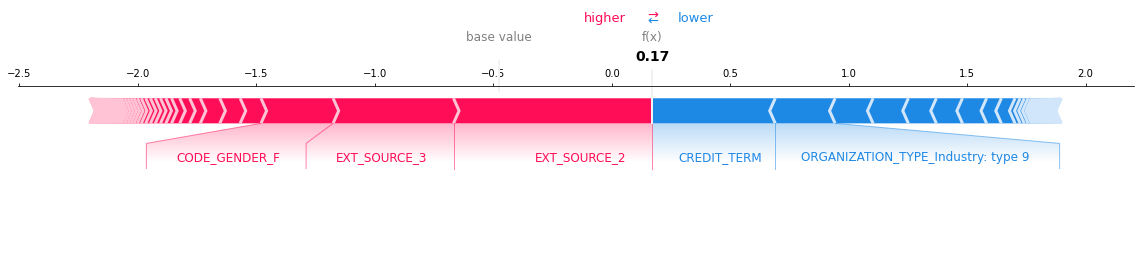

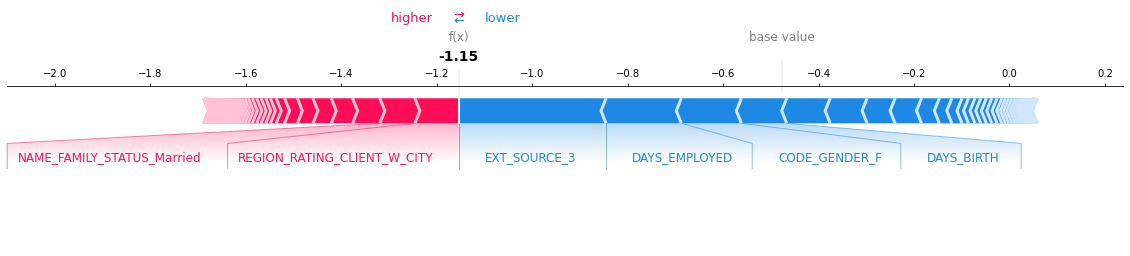

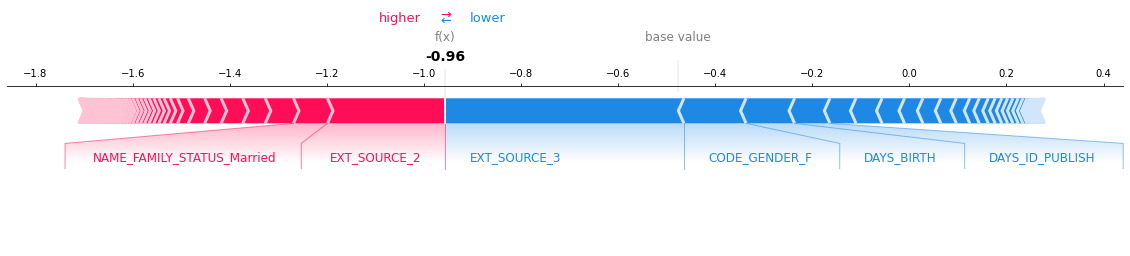

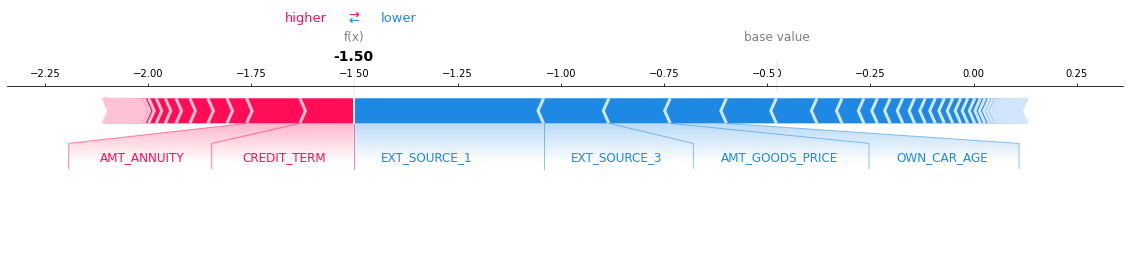

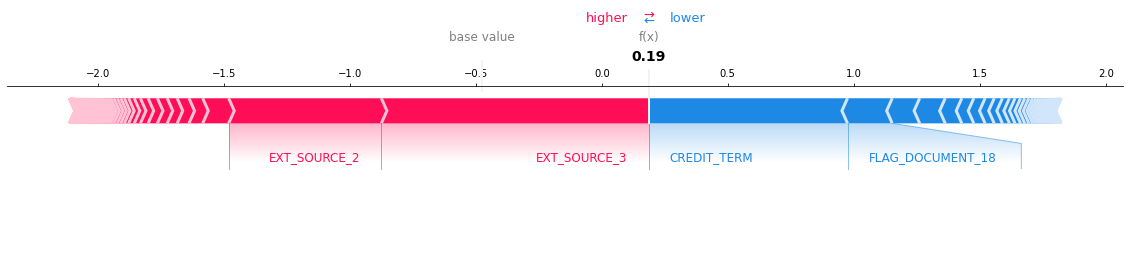

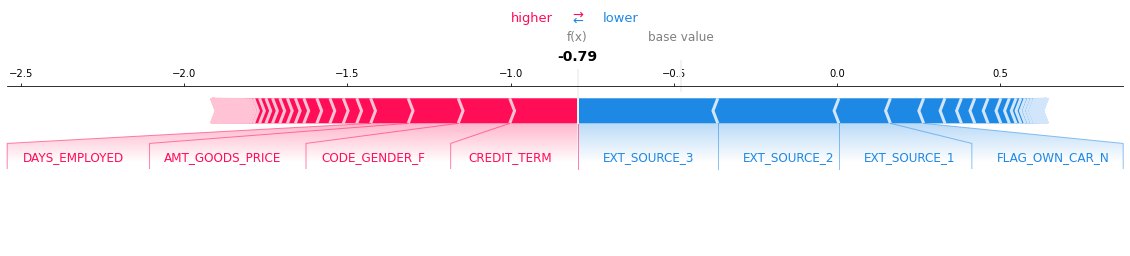

In [ ]:
for i in range(0,8):
    shap.force_plot(explainer.expected_value[1], shap_values[1][i], feature_names=df_X_test.columns, matplotlib=True)
plt.show()

# Enregistrement du dataset et du modèle

In [ ]:
from sklearn import model_selection


In [ ]:
#Export des fichiers de données traités
output_dir = '/content/drive/MyDrive/DS_P7/'

In [ ]:
# Enregistrement du dataset de test en dataframe (échantillon pris pour permettre le déploiement futur via GitHub)
df_test=pd.DataFrame(data=X_test_2,columns=X.columns)
df_test=df_test.sample(frac=0.05,random_state=0)
df_test.to_csv(os.path.join(output_dir,'df_test.csv'), index=False)

In [ ]:
df_init=df_sample2.sample(frac=0.5,random_state=10)
db_train,df_init=model_selection.train_test_split(df_init,test_size=0.3,stratify=df_init['TARGET'],random_state=0)
df_init=df_init.sample(frac=0.05,random_state=0)
df_init.to_csv(os.path.join(output_dir,'df_app.csv'), index=False)


In [ ]:
df_sample2.head(3)

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
252045,391645,1,166500.0,1288350.0,37800.0,1125000.0,0.046220,16166,-3968.0,-7232.0,...,0,0,0,0,0,0,1,0,1,0
88293,202516,0,157500.0,526491.0,32337.0,454500.0,0.008230,14683,-2042.0,-7389.0,...,0,0,0,0,0,0,1,0,1,0
77713,190102,0,180000.0,229500.0,22828.5,229500.0,0.015221,10612,-1415.0,-4748.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# dataframe
import pickle 
df_sample2.to_pickle("df_customers_sample.pkl")

In [ ]:
from google.colab import files
files.download('df_customers_sample.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Enregistrement du modèle LightGBM

pickle_out = open("lgbm_model.pkl", mode = "wb") 
pickle.dump(lgbm.best_estimator_, pickle_out)
pickle_out.close()

In [ ]:

files.download('lgbm_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('df_app.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('df_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>